# EPOC SERIES ANALYSIS

Through this notebook, we present an analysis and principal characteristics of EPOC data from a time series perspective.

## 1. Load libraries and data 

In [1]:
library(data.table); library(forecast); library(ggplot2); library(lubridate); library(plyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff

Attaching package: ‘lubridate’

The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from ‘package:base’:

    date


Attaching package: ‘plyr’

The following object is masked from ‘package:lubridate’:

    here



In [2]:
load("cleaned_data/epoc_data.RData")

## 2. Data preparation
The number of total cases per day is calculated. As there is no patient repetition for each hospitalization, this can be done easily with .N

In [3]:
fechas <- data.table("Fecha de ingreso" = seq(ymd('2008-01-01'),ymd('2015-12-31'),by='day'))
epoc_casos <- epoc_data[order(`Fecha de ingreso`),.N, by = list(`Fecha de ingreso`)]
epoc_casos <- join(fechas, epoc_casos)
epoc_casos[is.na(epoc_casos)] = 0
colnames(epoc_casos)[2] <- "Número de casos"

Joining by: Fecha de ingreso


## 3. Time series definition
We will suppose two different seasonalities: annual and weekly

In [4]:
epoc_ts <- msts(epoc_casos$`Número de casos`, seasonal.periods = c(7, 365.25), start = c(2008, 1))

## 4. Time series representation

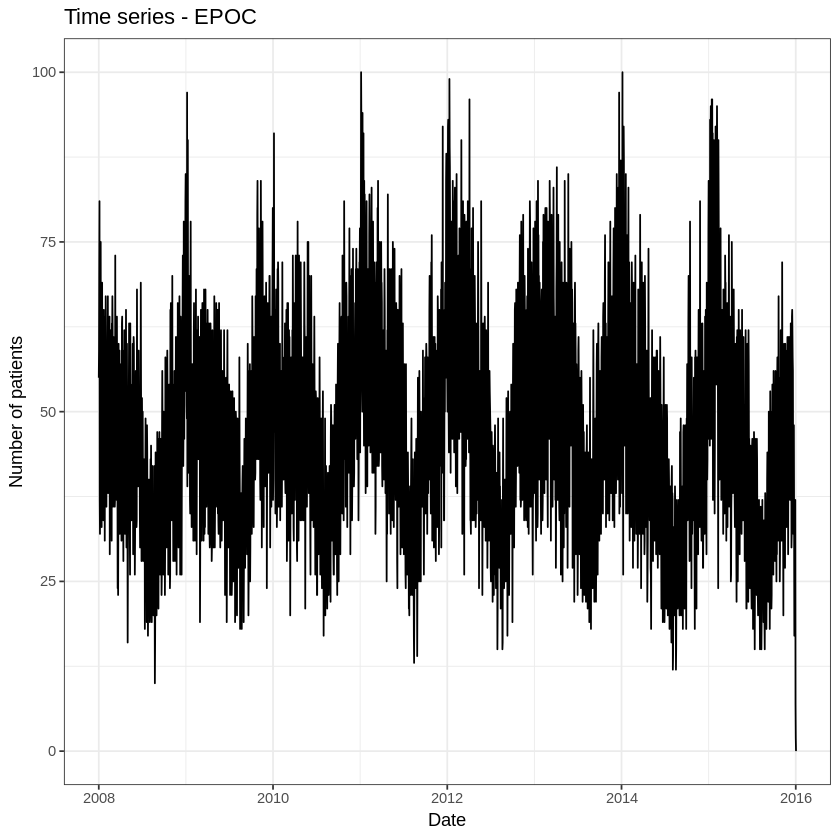

In [5]:
autoplot(epoc_ts) + labs(title = "Time series - EPOC", x = "Date", y = "Number of patients") + theme_bw()

## 5. Time series decomposition

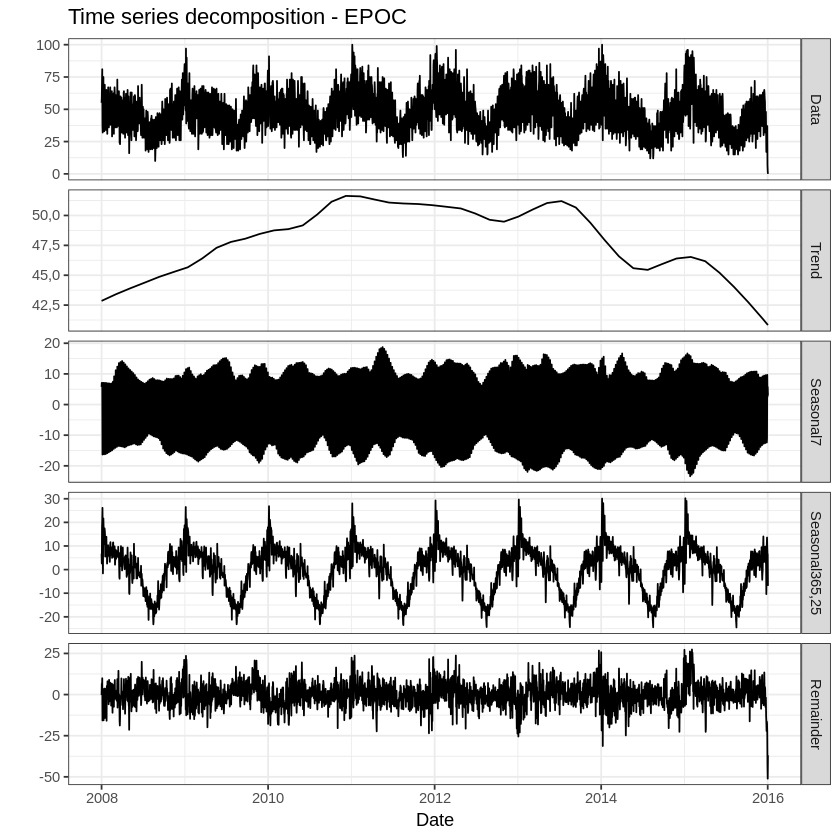

In [6]:
autoplot(mstl(epoc_ts)) + labs(title = "Time series decomposition - EPOC", x = "Date") + theme_bw()

## 6. Temporal distributions

[1] "C"

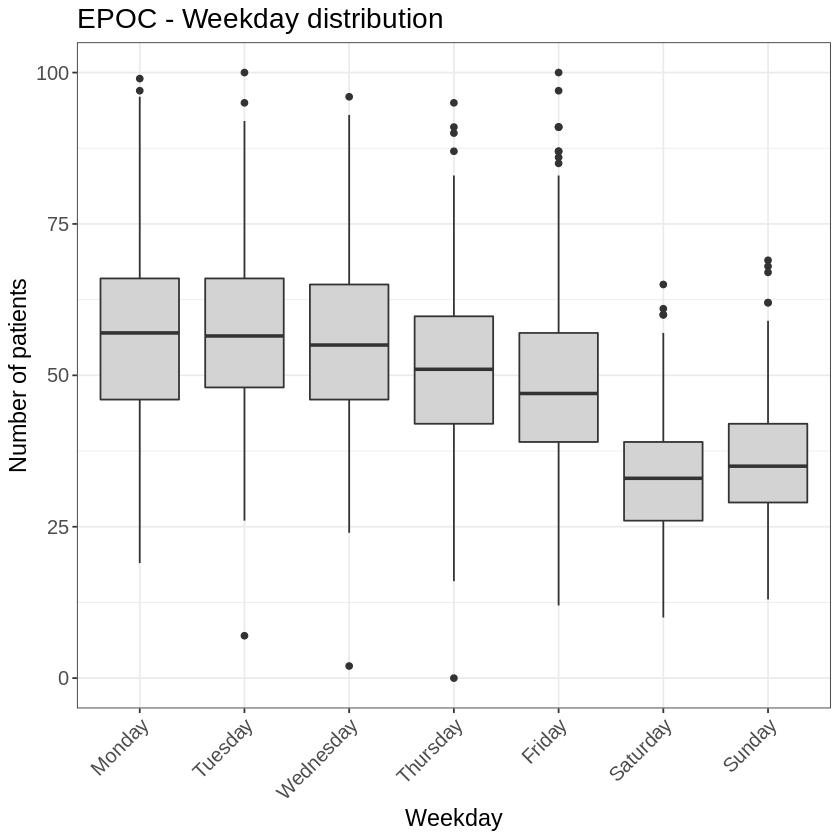

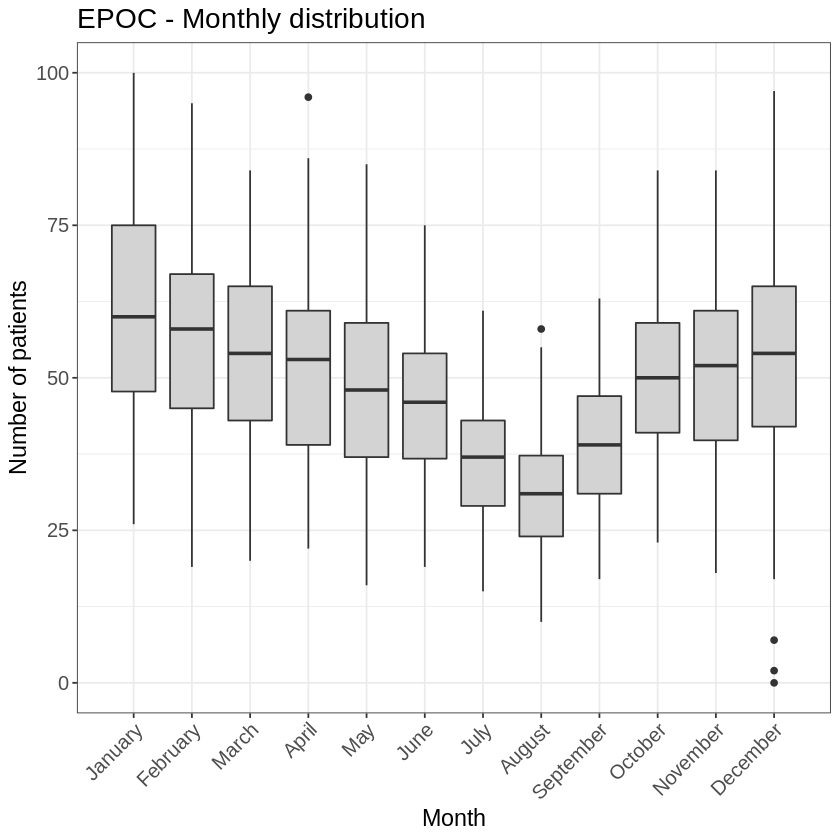

In [7]:
Sys.setlocale("LC_TIME", "C")
epoc_casos$weekday <- weekdays(epoc_casos$`Fecha de ingreso`)

ggplot(data = epoc_casos, aes(x = weekday, y = `Número de casos`, group = weekday)) +
  geom_boxplot(fill = "lightgrey") +
  scale_x_discrete(limits = c("Monday", "Tuesday", "Wednesday", "Thursday",
                              "Friday", "Saturday", "Sunday")) +
  labs(title = "EPOC - Weekday distribution", x = "Weekday", y = "Number of patients") +
  theme_bw() +
  theme(axis.text = element_text(size=12),
        text = element_text(size=14),
        axis.text.x = element_text(angle=45, hjust=1))

ggplot(data = epoc_casos, aes(x = month(`Fecha de ingreso`), y = `Número de casos`, group = month(`Fecha de ingreso`))) +
  geom_boxplot(fill = "lightgrey") +
  scale_x_discrete(limits = c("January", "February", "March", "April",
                              "May", "June", "July", "August",
                              "September", "October", "November", "December")) +
  labs(title = "EPOC - Monthly distribution",x = "Month", y = "Number of patients") +
  theme_bw() +
  theme(axis.text = element_text(size=12),
        text = element_text(size=14),
        axis.text.x = element_text(angle=45, hjust=1))

## 7. Autocorrelation and Partial Autocorrelation

Warning message in periods * seq(-20:20):
“longitud de objeto mayor no es múltiplo de la longitud de uno menor”Warning message in periods * seq(-20:20):
“longitud de objeto mayor no es múltiplo de la longitud de uno menor”

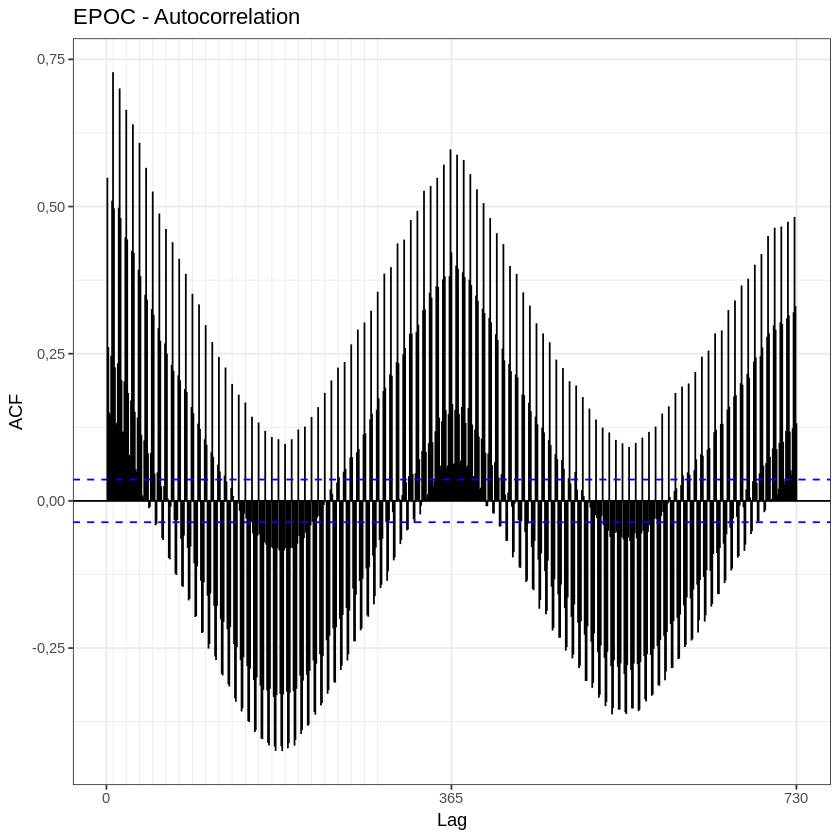

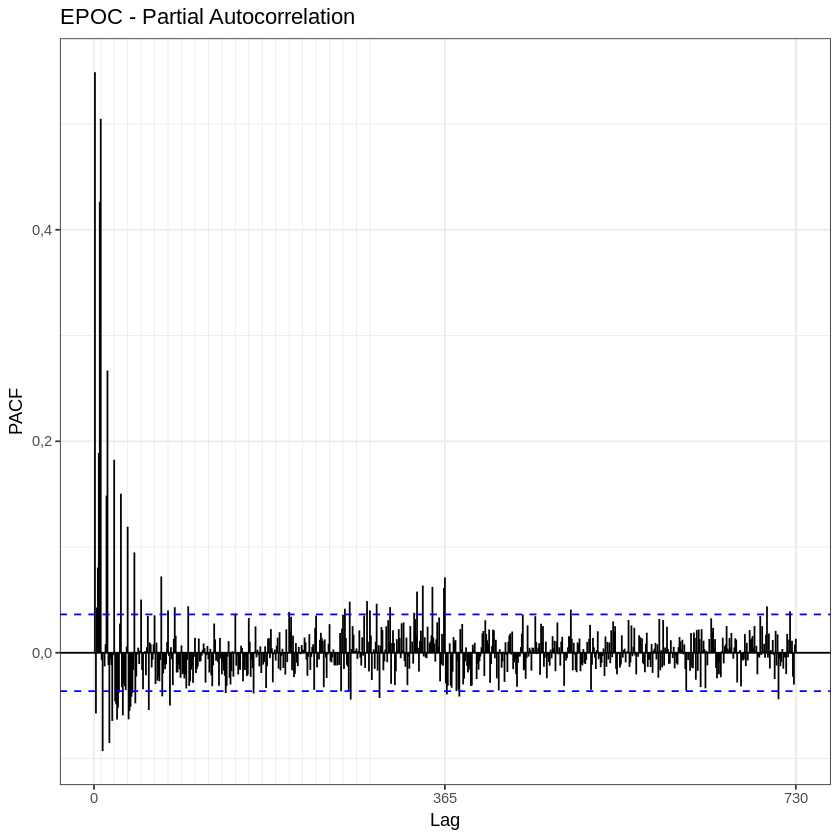

In [8]:
ggAcf(epoc_ts) + labs(title = "EPOC - Autocorrelation" ) + theme_bw()
ggPacf(epoc_ts) + labs(title = "EPOC - Partial Autocorrelation" ) + theme_bw()

From this last two plots, it is clear the annual seasonality and the ausence of a pronunciated trend. Lets see what happens if we just represent a 3-weeks period (as we are interested in a weekly periodicity too)

Warning message in periods * seq(-20:20):
“longitud de objeto mayor no es múltiplo de la longitud de uno menor”

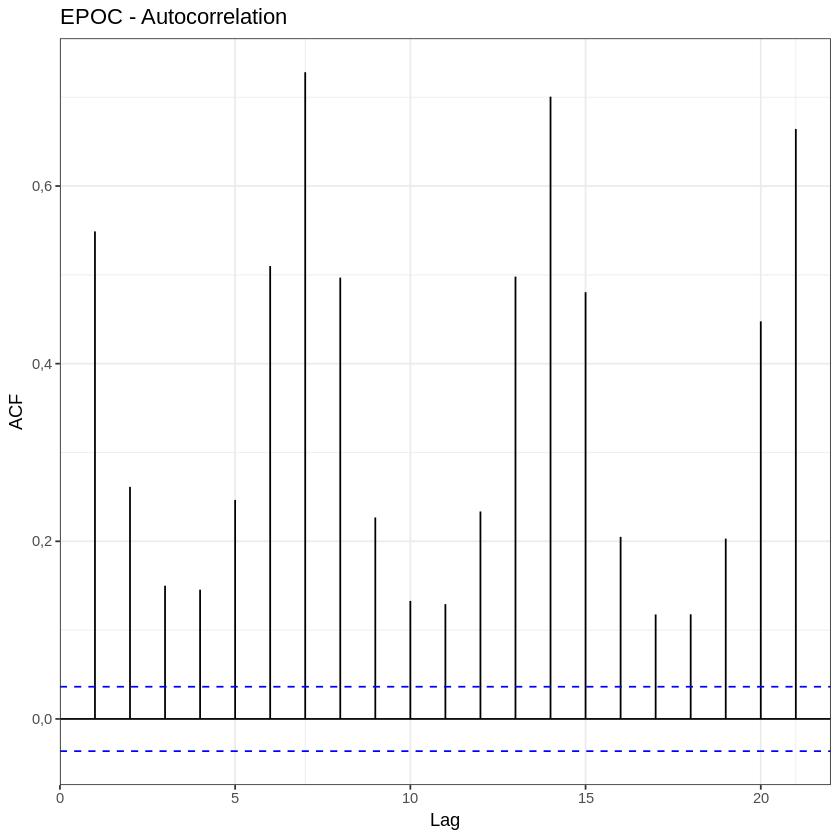

In [9]:
ggAcf(epoc_ts, lag.max = 21) + labs(title = "EPOC - Autocorrelation" ) + theme_bw()